In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [18]:
zoo = pd.read_csv(r"C:\Users\SREEVIBU\OneDrive\Desktop\animal\zoo.csv")
classes = pd.read_csv(r"C:\Users\SREEVIBU\OneDrive\Desktop\animal\class.csv")

In [19]:
print(zoo.shape)
print(classes.shape)

(101, 18)
(7, 4)


In [20]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [21]:
classes.isnull().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [22]:
df = zoo.merge(classes, left_on='class_type', right_on='Class_Number', how='left')

In [23]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [24]:
df.isnull().sum()

animal_name                          0
hair                                 0
feathers                             0
eggs                                 0
milk                                 0
airborne                             0
aquatic                              0
predator                             0
toothed                              0
backbone                             0
breathes                             0
venomous                             0
fins                                 0
legs                                 0
tail                                 0
domestic                             0
catsize                              0
class_type                           0
Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [ ]:
df = df.drop(['animal_name', 'class_type', 'Class_Number', 'Animal_Names'], axis=1)
display(df.head())

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Number_Of_Animal_Species_In_Class,Class_Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,41,Mammal
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,41,Mammal
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,13,Fish
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,41,Mammal
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,41,Mammal


In [26]:
X = df.drop('Class_Type', axis=1)
y = df['Class_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Number_Of_Animal_Species_In_Class
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,4
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,4
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,8
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,41
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,10


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Number_Of_Animal_Species_In_Class
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,41
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,41
66,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,41
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,41
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,41


89       Amphibian
26       Amphibian
42             Bug
70          Mammal
15    Invertebrate
Name: Class_Type, dtype: object

84    Mammal
55    Mammal
66    Mammal
67    Mammal
45    Mammal
Name: Class_Type, dtype: object

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
k_values = list(range(1, 21))
cv_scores_unscaled = []
cv_scores_scaled = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_unscaled = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores_unscaled.append(scores_unscaled.mean())
    scores_scaled = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores_scaled.append(scores_scaled.mean())

best_k_unscaled_index = np.argmax(cv_scores_unscaled)
best_k_unscaled = k_values[best_k_unscaled_index]
best_cv_score_unscaled = cv_scores_unscaled[best_k_unscaled_index]

best_k_scaled_index = np.argmax(cv_scores_scaled)
best_k_scaled = k_values[best_k_scaled_index]
best_cv_score_scaled = cv_scores_scaled[best_k_scaled_index]

print(f"Best k for unscaled data: {best_k_unscaled} with CV score: {best_cv_score_unscaled:.4f}")
print(f"Best k for scaled data: {best_k_scaled} with CV score: {best_cv_score_scaled:.4f}")

Best k for unscaled data: 1 with CV score: 0.9875
Best k for scaled data: 1 with CV score: 0.9625


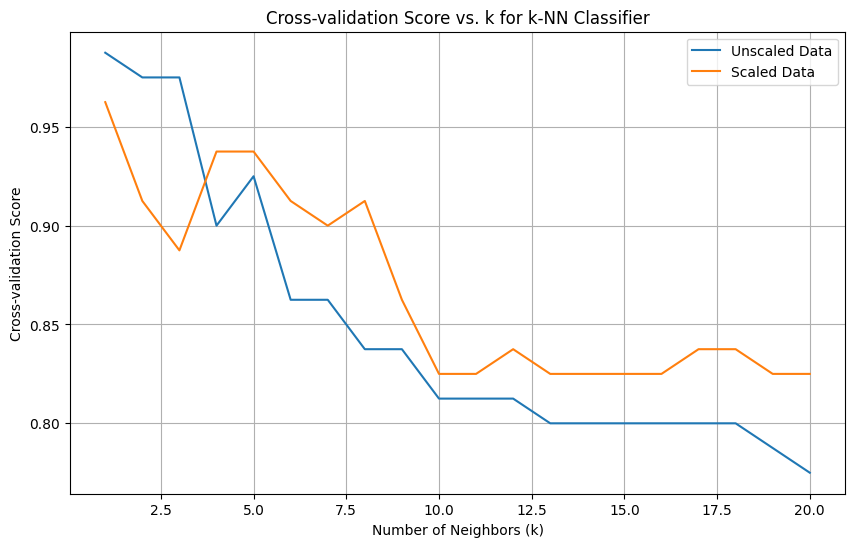

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores_unscaled, label='Unscaled Data')
plt.plot(k_values, cv_scores_scaled, label='Scaled Data')
plt.title('Cross-validation Score vs. k for k-NN Classifier')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-validation Score')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
knn_final = KNeighborsClassifier(n_neighbors=best_k_scaled)
knn_final.fit(X_train_scaled, y_train)
y_pred_scaled = knn_final.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)

print(f"Test Accuracy (Scaled Data): {accuracy_scaled:.4f}")
print("\nConfusion Matrix (Scaled Data):\n", conf_matrix_scaled)
print("\nClassification Report (Scaled Data):\n", y_pred_scaled)

Test Accuracy (Scaled Data): 0.9524

Confusion Matrix (Scaled Data):
 [[ 0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  1]]

Classification Report (Scaled Data):
 ['Mammal' 'Mammal' 'Mammal' 'Mammal' 'Mammal' 'Bug' 'Mammal' 'Mammal'
 'Mammal' 'Mammal' 'Fish' 'Bug' 'Bug' 'Bird' 'Amphibian' 'Mammal' 'Mammal'
 'Bird' 'Fish' 'Mammal' 'Reptile']


In [31]:
print(f"Best k for scaled data: {best_k_scaled}")
print(f"Best cross-validation score for scaled data: {best_cv_score_scaled:.4f}")
print(f"Test accuracy for scaled data: {accuracy_scaled:.4f}")
print("Confusion matrix for scaled data:\n", conf_matrix_scaled)

Best k for scaled data: 1
Best cross-validation score for scaled data: 0.9625
Test accuracy for scaled data: 0.9524
Confusion matrix for scaled data:
 [[ 0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  1]]


In [33]:
import pickle

with open("knn_zoo_model.pkl", "wb") as f:
    pickle.dump({"model": knn_final, "scaler": scaler}, f)